In [6]:
import pandas as pd

# Caricamento del dataset
file_path = 'C:/Users/comme/Downloads/owid-covid-data.csv'
data = pd.read_csv(file_path)

# Dimensioni del dataset
dimensions = data.shape
print(f"Dimensioni del dataset: {dimensions}")

# Metadati del dataset
metadata = data.info()

# Calcolo del numero totale di casi per ogni continente (ignorando le locazioni senza continente)
continent_cases = data.dropna(subset=['continent']).groupby('continent')['total_cases'].sum()
print("\nNumero totale di casi per ogni continente:")
print(continent_cases)

Dimensioni del dataset: (402717, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402717 entries, 0 to 402716
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402717 non-null  object 
 1   continent                                   383454 non-null  object 
 2   location                                    402717 non-null  object 
 3   date                                        402717 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed              

In [9]:
# Funzione per calcolare i descrittori statistici di un continente
def descrittori_continente(data, continente):
    continente_data = data[data['continent'] == continente]['total_cases'].dropna()
    massimo = continente_data.max()
    media = continente_data.mean()
    totale_casi = data['total_cases'].sum()
    percentuale = (continente_data.sum() / totale_casi) * 100
    return massimo, media, percentuale

# Nomi dei continenti da confrontare
continente1 = 'Europe'
continente2 = 'Asia'

# Calcolo dei descrittori per i due continenti
descrittori_continente1 = descrittori_continente(data, continente1)
descrittori_continente2 = descrittori_continente(data, continente2)

# Mostra i risultati
print(f"Descrittori per {continente1}:")
print(f"Massimo: {descrittori_continente1[0]}")
print(f"Media: {descrittori_continente1[1]}")
print(f"Percentuale: {descrittori_continente1[2]:.2f}%\n")

print(f"Descrittori per {continente2}:")
print(f"Massimo: {descrittori_continente2[0]}")
print(f"Media: {descrittori_continente2[1]}")
print(f"Percentuale: {descrittori_continente2[2]:.2f}%")

Descrittori per Europe:
Massimo: 38997490.0
Media: 2762450.796226847
Percentuale: 7.82%

Descrittori per Asia:
Massimo: 99357895.0
Media: 3327539.853501148
Percentuale: 8.24%


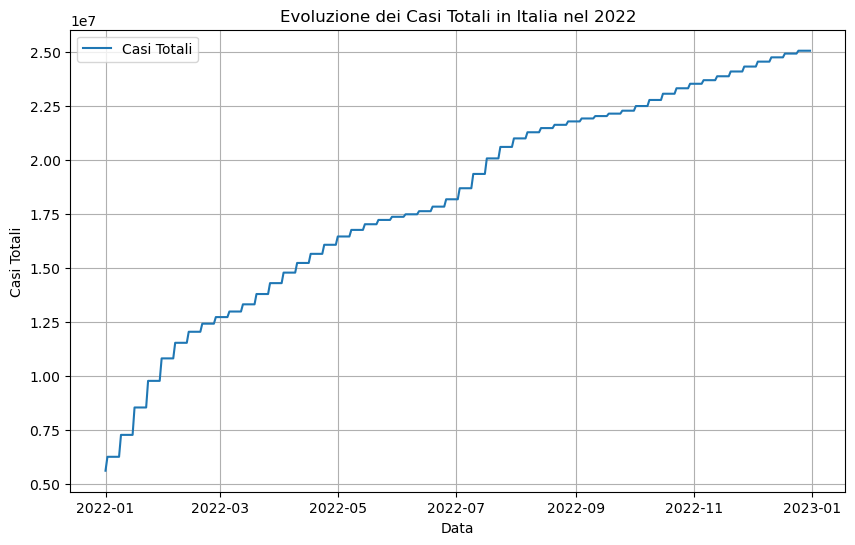

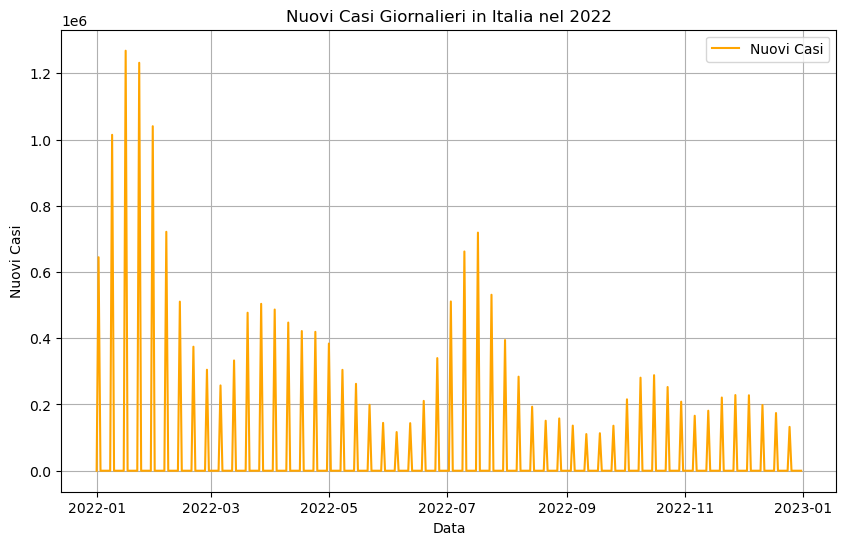

C:\Users\comme\AppData\Local\Temp\ipykernel_3004\1778736345.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italia_2022['new_cases_cumsum'] = italia_2022['new_cases'].cumsum()


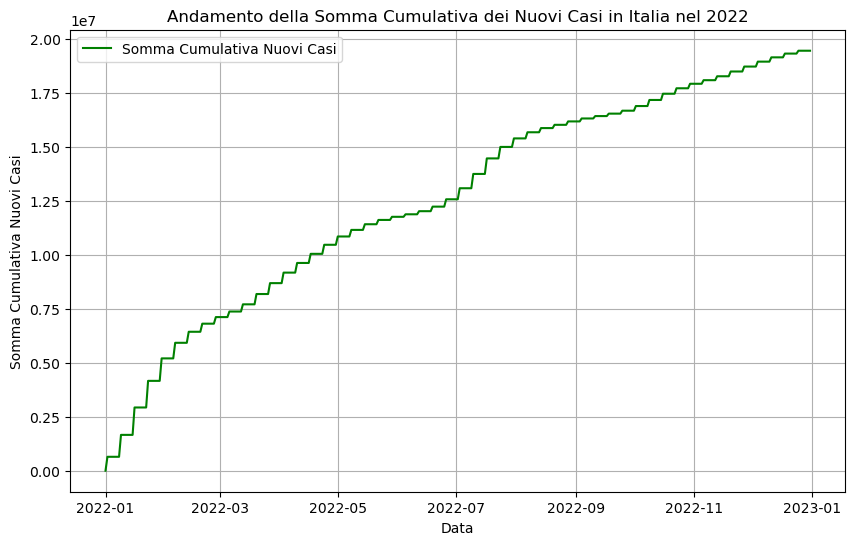


L'andamento della somma cumulativa dei nuovi casi nel 2022 segue una tendenza molto simile a quella dei casi totali. 
Questo è atteso poiché i casi totali rappresentano l'accumulo di tutti i nuovi casi riportati fino a quella data. 
Di conseguenza, entrambe le curve dovrebbero crescere nel tempo e mostrare punti di incremento simili in corrispondenza di periodi con un numero elevato di nuovi casi.



In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento del dataset
file_path = 'C:/Users/comme/Downloads/owid-covid-data.csv'
data = pd.read_csv(file_path)

# Filtrare i dati per l'Italia nel 2022
data['date'] = pd.to_datetime(data['date'])
italia_2022 = data[(data['location'] == 'Italy') & (data['date'].dt.year == 2022)]

# Grafico dell'evoluzione dei casi totali rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(italia_2022['date'], italia_2022['total_cases'], label='Casi Totali')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.title('Evoluzione dei Casi Totali in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.show()

# Grafico del numero di nuovi casi rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(italia_2022['date'], italia_2022['new_cases'], label='Nuovi Casi', color='orange')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.title('Nuovi Casi Giornalieri in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.show()

# Grafico dell'andamento della somma cumulativa dei nuovi casi nel 2022
italia_2022['new_cases_cumsum'] = italia_2022['new_cases'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(italia_2022['date'], italia_2022['new_cases_cumsum'], label='Somma Cumulativa Nuovi Casi', color='green')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa Nuovi Casi')
plt.title('Andamento della Somma Cumulativa dei Nuovi Casi in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.show()

# Commento sulle similarità tra l'andamento dei casi totali e la somma cumulativa dei nuovi casi
similarity_comment = """
L'andamento della somma cumulativa dei nuovi casi nel 2022 segue una tendenza molto simile a quella dei casi totali. 
Questo è atteso poiché i casi totali rappresentano l'accumulo di tutti i nuovi casi riportati fino a quella data. 
Di conseguenza, entrambe le curve dovrebbero crescere nel tempo e mostrare punti di incremento simili in corrispondenza di periodi con un numero elevato di nuovi casi.
"""
print(similarity_comment)

<Figure size 1200x800 with 0 Axes>

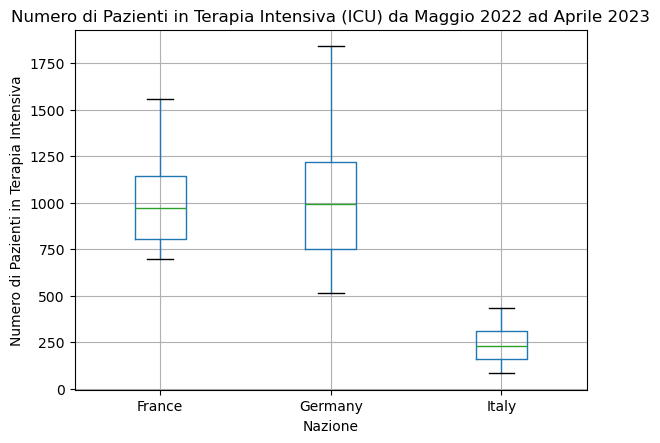


Il boxplot mostra il numero di pazienti in terapia intensiva (ICU) in Italia, Germania e Francia da maggio 2022 ad aprile 2023.
Dai dati, si osserva che:
- La Germania tende ad avere una maggiore variabilità nel numero di pazienti in ICU rispetto a Italia e Francia.
- L'Italia e la Francia mostrano una distribuzione più simile tra loro, ma l'Italia sembra avere alcuni picchi più alti.
- La mediana del numero di pazienti in ICU in Germania è più alta rispetto a quella dell'Italia e della Francia, indicando un carico mediamente maggiore di pazienti in terapia intensiva.



In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento del dataset
file_path = 'C:/Users/comme/Downloads/owid-covid-data.csv'
data = pd.read_csv(file_path)

# Convertire la colonna della data in formato datetime
data['date'] = pd.to_datetime(data['date'])

# Filtrare i dati per Italia, Germania e Francia da maggio 2022 ad aprile 2023
nazioni = ['Italy', 'Germany', 'France']
filtered_data = data[(data['location'].isin(nazioni)) & 
                     (data['date'] >= '2022-05-01') & 
                     (data['date'] <= '2023-04-30')]

# Creare un boxplot per il numero di pazienti in terapia intensiva (ICU)
plt.figure(figsize=(12, 8))
icu_data = filtered_data[['location', 'date', 'icu_patients']].dropna()
icu_data.boxplot(by='location', column='icu_patients', grid=False)
plt.title('Numero di Pazienti in Terapia Intensiva (ICU) da Maggio 2022 ad Aprile 2023')
plt.suptitle('')  # Rimuove il titolo automatico di pandas
plt.xlabel('Nazione')
plt.ylabel('Numero di Pazienti in Terapia Intensiva')
plt.grid(True)
plt.show()

# Commento sulle differenze tra le nazioni
commento = """
Il boxplot mostra il numero di pazienti in terapia intensiva (ICU) in Italia, Germania e Francia da maggio 2022 ad aprile 2023.
Dai dati, si osserva che:
- La Germania tende ad avere una maggiore variabilità nel numero di pazienti in ICU rispetto a Italia e Francia.
- L'Italia e la Francia mostrano una distribuzione più simile tra loro, ma l'Italia sembra avere alcuni picchi più alti.
- La mediana del numero di pazienti in ICU in Germania è più alta rispetto a quella dell'Italia e della Francia, indicando un carico mediamente maggiore di pazienti in terapia intensiva.
"""
print(commento)

In [15]:
import pandas as pd

# Caricamento del dataset
file_path = 'C:/Users/comme/Downloads/owid-covid-data.csv'
data = pd.read_csv(file_path)

# Convertire la colonna della data in formato datetime
data['date'] = pd.to_datetime(data['date'])

# Filtrare i dati per Italia, Germania, Francia e Spagna nel 2023
nazioni = ['Italy', 'Germany', 'France', 'Spain']
filtered_data_2023 = data[(data['location'].isin(nazioni)) & 
                          (data['date'].dt.year == 2023)]

# Verifica dei dati nulli nella colonna 'hosp_patients'
null_counts = filtered_data_2023['hosp_patients'].isnull().sum()

# Gestione dei dati nulli: sostituire con 0 se appropriato
filtered_data_2023['hosp_patients'].fillna(0, inplace=True)

# Calcolare la somma dei pazienti ospedalizzati per ogni nazione
hospitalized_sum = filtered_data_2023.groupby('location')['hosp_patients'].sum()

# Mostrare i risultati
print(hospitalized_sum)

# Commento sui dati nulli e la loro gestione
commento_null_handling = f"""
Il dataset contiene {null_counts} valori nulli nella colonna 'hosp_patients' per l'anno 2023. 
Questi valori nulli sono stati sostituiti con 0 per calcolare la somma totale dei pazienti ospedalizzati.
"""
print(commento_null_handling)

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

Il dataset contiene 843 valori nulli nella colonna 'hosp_patients' per l'anno 2023. 
Questi valori nulli sono stati sostituiti con 0 per calcolare la somma totale dei pazienti ospedalizzati.



C:\Users\comme\AppData\Local\Temp\ipykernel_3004\532893031.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2023['hosp_patients'].fillna(0, inplace=True)
